# **Конкурс «Кредитный скоринг»**

**Задача**

Обучить классификатор, наилучшим образом предсказывающий целевую переменную.

**Данные на вход**

shift_ml_2025_test.csv

shift_ml_2025_train.csv

**Данные на выход**

submission.csv

# Обзор датасета 

Набор данных содержит информацию о финансовых показателях клиентов банка, включая аспекты кредитной истории, балансы и информацию о самом клиенте. Каждая запись представляет собой клиента с 108 атрибутами, как числовыми, так и категориальными.

Анализ этих показателей важен для построения модели, предсказывающей вероятность одобрения кредита для каждого клиента.

In [ ]:
import pandas as pd
from pathlib import Path


# Полные локальные пути к файлам
TEST_PATH  = Path(r"C:\Users\270088\shift_2025\shift_ml_2025_test.csv")
TRAIN_PATH = Path(r"C:\Users\270088\shift_2025\shift_ml_2025_train.csv")

# Загрузка данных
test  = pd.read_csv(TEST_PATH)
train = pd.read_csv(TRAIN_PATH)
print(f"Тестовый датасет: {test.shape}")
print(f"Первые строки:\n{test.head()}")

C:\Users\270088\AppData\Local\Temp\ipykernel_2888\789122311.py:10: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(TRAIN_PATH)


Тестовый датасет: (134531, 108)
Первые строки:
         id  сумма_займа срок_займа  процентная_ставка  аннуитет рейтинг  \
0  85540387     450000.0     3 года               9.49   14413.0       Б   
1  28112500     400000.0     3 года               6.03   12174.5       А   
2  65731570    1250000.0     3 года              12.05   41548.0       В   
3  65874747     977500.0      5 лет              20.99   26439.5       Д   
4  57893355     520000.0     3 года              18.25   18865.0       Д   

  допрейтинг                        профессия_заемщика     стаж  \
0         Б2                     обслуживание клиентов  10+ лет   
1         А1             помощник по правовым вопросам    5 лет   
2         В1  специалист по анализу кредитоспособности    5 лет   
3         Д5                    специальный специалист   3 года   
4         Д1            руководитель районного проекта   3 года   

  владение_жильем  ...  процент_счетов_прев_75_лимита кол-во_публ_банкротств  \
0         ИПО

In [2]:
# Подсчёт % пропущенных значений
nan_percent_df = (train.isnull().mean() * 100).reset_index()
nan_percent_df.columns = ['column', 'nan_percent']

# Вывод полной таблицы
nan_percent_df

,column,nan_percent
0,id,0.000000
1,сумма_займа,0.000000
2,срок_займа,0.000000
3,процентная_ставка,0.000000
4,аннуитет,0.000000
...,...,...
104,лимит_по_картам,3.508650
105,лимит_по_аннуитетным_счетам,5.018835
106,кредитный_баланс_по_возоб_счетам,98.611803
107,особая_ситуация,0.000000


# Очистка данных и заполнение пропущенных значений

Для обеспечения качества данных были удалены колонки, содержащие более 50% пропущенных значений. При таком количестве пропусков сложно полагаться на эти данные, а корректное заполнение становится невозможным.

In [ ]:
# Подсчёт % пропущенных значений
nan_percent = train.isnull().mean() * 100

# Удаляем колонки, где более 50% пропусков
columns_to_drop = nan_percent[nan_percent > 50].index
train_reduced = train.drop(columns=columns_to_drop)

# Заново считаем % пропусков в оставшихся колонках
nan_filtered = train_reduced.isnull().mean() * 100
nan_filtered = nan_filtered[nan_filtered > 0].reset_index()
nan_filtered.columns = ['column', 'nan_percent']

nan_filtered.sort_values('nan_percent')

,column,nan_percent
2,индекс_проживания,0.000083
4,кол-во_заявок_за_полгода,0.000083
39,кол-во_залогов,0.002808
6,кол-во_взысканий_за_последний_год,0.003882
14,кол-во_списаний_за_год,0.003882
3,пдн,0.027916
38,кол-во_публ_банкротств,0.051042
5,коэфф_загрузки_возобновляемого_счета,0.063513
42,лимит_по_картам,3.508650
41,кредитный_баланс_без_ипотеки,3.508650


In [ ]:
# Удаляем те же колонки из тестового датасета
test_reduced = test.drop(columns=columns_to_drop)

Для остальных признаков с пропущенными значениями были применены следующие стратегии заполнения:

1. Числовые признаки:
  Пропущенные значения в числовых признаках были заполнены средним значением по столбцу. Это позволяет сохранить общее распределение данных при заполнении пропусков. Для заполнения использовался SimpleImputer со стратегией mean.

2. Категориальные признаки:
  Пропущенные значения в категориальных признаках были заполнены наиболее часто встречающимся значением (модой) по столбцу. Это помогает сохранить распределение признака. Для заполнения использовался SimpleImputer со стратегией most_frequent.

Применение этих методов заполнения пропусков позволило подготовить набор данных для дальнейшего анализа и моделирования, минимизируя искажения и обеспечивая сохранение целостности и прогностической силы данных.

In [ ]:
from sklearn.impute import SimpleImputer


# Отдельно определяем числовые и нечисловые признаки (на всём датафрейме)
num_cols = train_reduced.select_dtypes(include=['float64', 'int64']).columns
cat_cols = train_reduced.select_dtypes(include=['object', 'category']).columns

# Проверка наличия NaN
num_cols_with_nan = [col for col in num_cols if train_reduced[col].isnull().any()]
cat_cols_with_nan = [col for col in cat_cols if train_reduced[col].isnull().any()]

# Импутируем числовые NaN медианой
if num_cols_with_nan:
    num_imputer = SimpleImputer(strategy='median')
    train_reduced[num_cols_with_nan] = num_imputer.fit_transform(train_reduced[num_cols_with_nan])

# Импутируем категориальные NaN модой
if cat_cols_with_nan:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    train_reduced[cat_cols_with_nan] = cat_imputer.fit_transform(train_reduced[cat_cols_with_nan])

# Проверка: остались ли NaN в train_reduced
nan_check = train_reduced.isnull().sum()
nan_check = nan_check[nan_check > 0].reset_index()
nan_check.columns = ['column', 'nan_count']


print("NaN в train_reduced после финальной импутации:")
display(nan_check)


NaN train_reduced после финальной импутации:


,column,nan_count


In [ ]:
# Обученный на трейне импутер заполняет тест

# Импутируем числовые NaN медианой
if num_cols_with_nan:
    test_reduced[num_cols_with_nan] = num_imputer.transform(test_reduced[num_cols_with_nan])

# Импутируем категориальные NaN модой
if cat_cols_with_nan:
    test_reduced[cat_cols_with_nan] = cat_imputer.transform(test_reduced[cat_cols_with_nan])

# Проверка: остались ли NaN в test_reduced
nan_check = test_reduced.isnull().sum()
nan_check = nan_check[nan_check > 0].reset_index()
nan_check.columns = ['column', 'nan_count']

print("NaN в test_reduced после финальной импутации:")
display(nan_check)

NaN test_reduced после финальной импутации:


,column,nan_count


# Визуализация данных

In [ ]:
# ─────────────────────────────────────────────────────────────
# 0. Библиотеки и базовые настройки
# ─────────────────────────────────────────────────────────────
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
%matplotlib inline
sns.set(style="whitegrid", rc={"figure.dpi": 110})

TARGET = "итоговый_статус_займа"
df = train_reduced.copy()

Анализ распределения целевой переменной показал, что классы в тренировочном наборе данных несбалансированы: около 80% составляют объекты класса 0 и 20% — класса 1. Была предпринята попытка учесть этот дисбаланс в параметрах модели, однако это не привело к заметному улучшению метрики ROC AUC. Вероятно, благодаря большому общему объему данных модель смогла достаточно хорошо обучиться и без явного указания на несбалансированность классов.

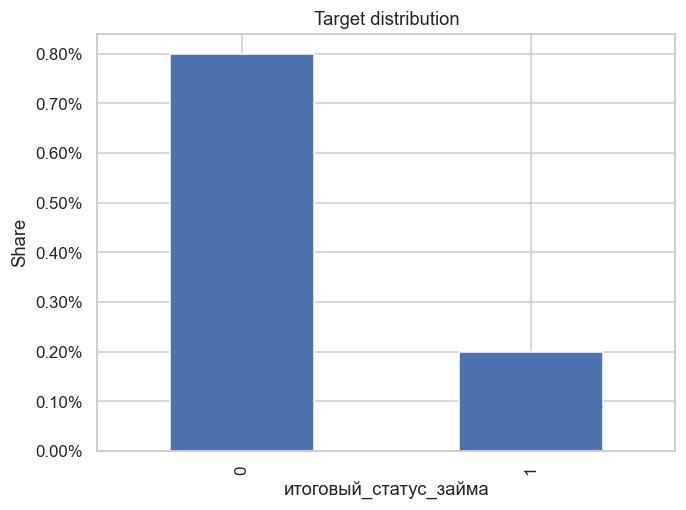

In [ ]:
# ─────────────────────────────────────────────────────────────
# 1. Распределение целевого признака
# ─────────────────────────────────────────────────────────────
plt.figure()
df[TARGET].value_counts(normalize=True).sort_index().plot(kind="bar")
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.title("Target distribution")
plt.xlabel(TARGET)
plt.ylabel("Share")
plt.tight_layout()
plt.show()

На графике представлены топ-15 признаков, отсортированных по модулю коэффициента корреляции с целевой переменной. Признаки, расположенные в верхней части графика, такие как "процентная ставка" и "сумма выплат по просрочкам", имеют наибольшую корреляцию (по модулю) с целевой переменной. Отрицательные значения коэффициентов корреляции, например, у признаков "нижний порог рейтинга заемщика" и "верхний порог рейтинга заемщика", указывают на обратную зависимость с целевой переменной.

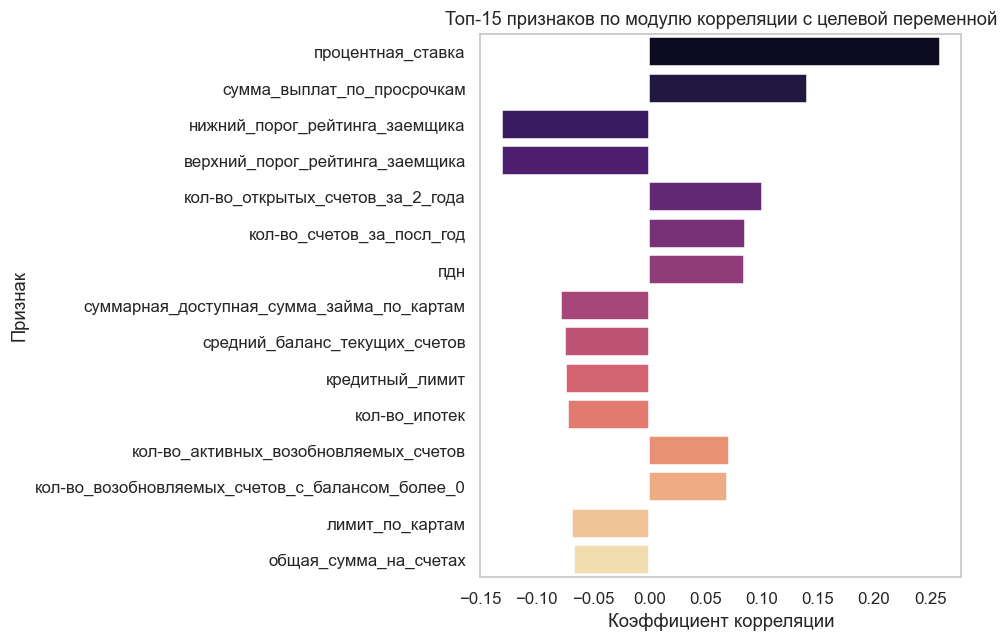

In [ ]:
# ─────────────────────────────────────────────────────────────
# 1. Топ коррелирующие признаки
# ─────────────────────────────────────────────────────────────
import matplotlib.pyplot as plt
import seaborn as sns


# Настройки
sns.set(style="whitegrid")
target_col = 'итоговый_статус_займа'

# Топ-15 признаков, коррелирующих с целевой переменной
numeric_cols = train_reduced.select_dtypes(include=['float64', 'int64']).drop(columns=[target_col])
correlations = numeric_cols.corrwith(train_reduced[target_col]).sort_values(key=abs, ascending=False)
top_corr = correlations.head(15)

# Визуализация
plt.figure(figsize=(9, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="magma")
plt.title("Топ-15 признаков по модулю корреляции с целевой переменной")
plt.xlabel("Коэффициент корреляции")
plt.ylabel("Признак")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


Для выявления факторов, влияющих на одобрение кредита, был проведен корреляционный анализ числовых признаков. Наибольшая корреляция с целевой переменной была обнаружена у признака "Процентная ставка", что указывает на необходимость дальнейшего изучения характера этой связи: определяет ли более высокая ставка более рискованных заемщиков, которым банк готов одобрить кредит, или банк предпочитает менее рискованных заемщиков с низкими ставками.

*При тестах было выявлно, что удаление кредитной_ставки значительно ухудшает качество модели, поэтому, хоть параметр и выбивается своей высокой корреляцией с таргетом, было решено его оставить.*

,count,mean,std,min,25%,50%,75%,max
id,1210779.0,5.634301e+07,3.836485e+07,55716.00,20007112.00,57734178.00,84546640.50,1.456364e+08
сумма_займа,1210779.0,7.210352e+05,4.358215e+05,25000.00,400000.00,600000.00,1000000.00,2.000000e+06
процентная_ставка,1210779.0,1.323988e+01,4.767252e+00,5.31,9.75,12.74,15.99,3.099000e+01
аннуитет,1210779.0,2.190478e+04,1.307606e+04,246.50,12424.00,18771.50,29022.00,8.599150e+04
годовой_доход,1210779.0,1.525304e+06,1.401176e+06,0.00,915200.00,1300000.00,1800000.00,2.199840e+08
...,...,...,...,...,...,...,...,...
кол-во_залогов,1210779.0,5.221267e-02,3.996723e-01,0.00,0.00,0.00,0.00,8.500000e+01
кредитный_лимит,1210779.0,8.567898e+06,8.708739e+06,0.00,2583550.00,5623025.00,12168050.00,5.000000e+08
кредитный_баланс_без_ипотеки,1210779.0,2.461666e+06,2.348034e+06,0.00,1072850.00,1865200.00,3061000.00,1.704048e+08
лимит_по_картам,1210779.0,1.070840e+06,1.061229e+06,0.00,400000.00,755000.00,1370000.00,5.527500e+07


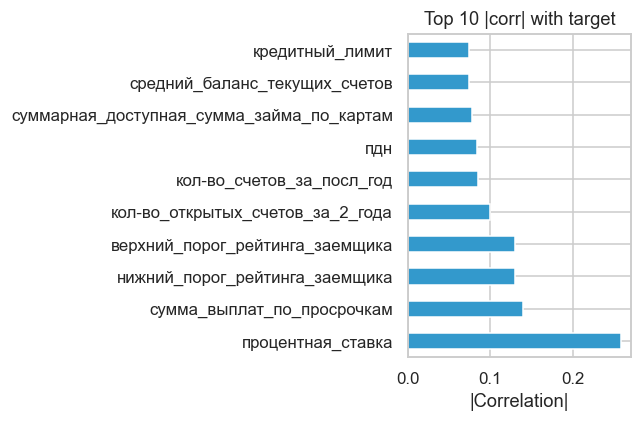

In [ ]:
# ─────────────────────────────────────────────────────────────
# 2. Числовые признаки: summary + топ-корреляции
# ─────────────────────────────────────────────────────────────
num_cols = df.select_dtypes(include="number").columns.drop(TARGET)
display(df[num_cols].describe().T)

corr = df[num_cols.union([TARGET])].corr()[TARGET].drop(TARGET)
top_corr = corr.abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(6,4))
top_corr.plot(kind="barh", color="#3399cc")
plt.title("Top 10 |corr| with target")
plt.xlabel("|Correlation|")
plt.tight_layout()
plt.show()

Анализ распределений трех наиболее коррелирующих числовых признаков позволил выявить интересные закономерности. Более низкие значения "процентной ставки" чаще встречаются для отклоненных кредитов, в то время как одобренные кредиты могут иметь как низкие, так и высокие ставки. "Сумма выплат по просрочкам" в основном сосредоточена около нуля для отклоненных кредитов. Последний же график показывает, что банк выдает клиентам рейтинг с определенным шагом, а не плавно.

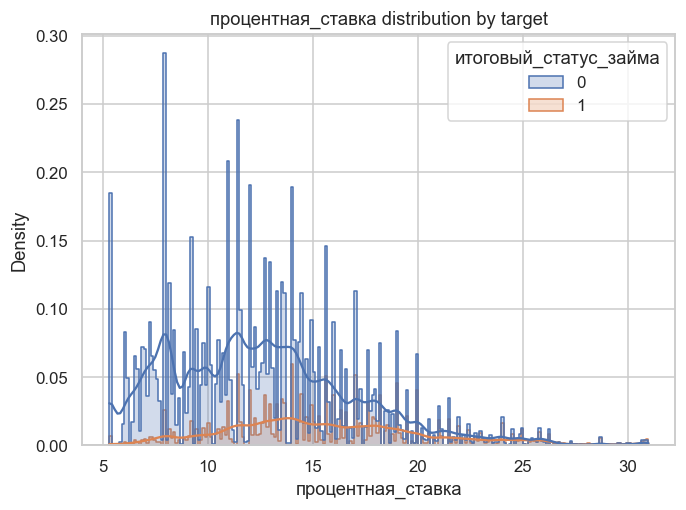

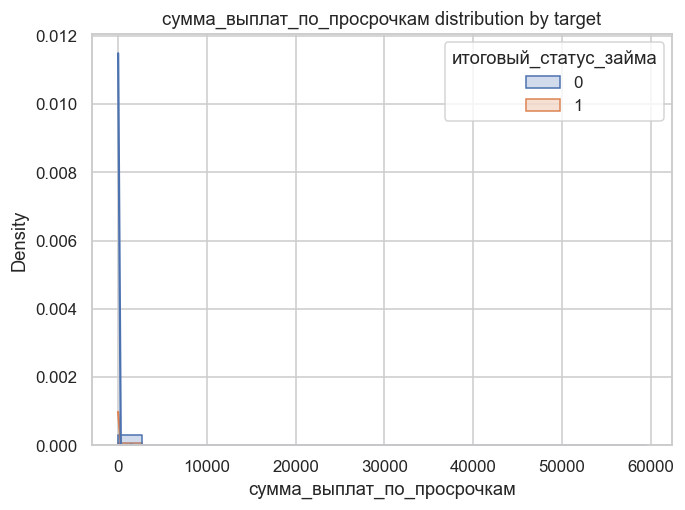

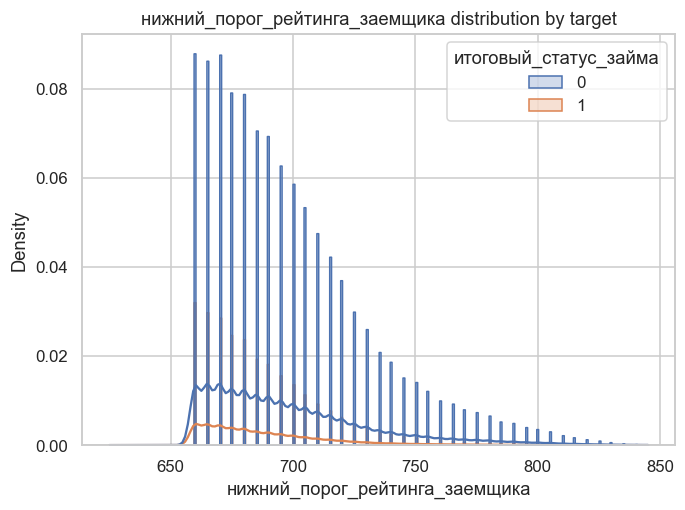

In [ ]:
# ─────────────────────────────────────────────────────────────
# 3. Распределения для трёх самых сильных числовых фичей
# ─────────────────────────────────────────────────────────────
strong_num = top_corr.head(3).index
for col in strong_num:
    plt.figure()
    sns.histplot(data=df, x=col, hue=TARGET,
                 kde=True, element="step", stat="density")
    plt.title(f"{col} distribution by target")
    plt.tight_layout()
    plt.show()

Для оценки прогностической силы процентной ставки в отношении одобрения кредита был вычислен ROC AUC. Использование непрерывного значения процентной ставки дало результат 0.683, в то время как бинаризация признака (разделение на ставки выше и ниже 14%) привела к ухудшению показателя (0.626). Это указывает на то, что непрерывная переменная содержит больше информации, чем просто разделение на высокие и низкие ставки. Такой процент выбран как рзделитель двух равновесных частей графика.

In [18]:
from sklearn.metrics import roc_auc_score
tmp = df.copy()
tmp["high_rate"] = (tmp["процентная_ставка"] > 14).astype(int)
print("AUC plain rate :", roc_auc_score(tmp[TARGET], tmp["процентная_ставка"]))
print("AUC high_flag  :", roc_auc_score(tmp[TARGET], tmp["high_rate"]))
# ПОКАЗЫВАЕТ, КАК [ПРОЦЕНТНАЯ СТАВКА > 14%] ВЛИЯЕТ НА ПРЕДСКАЗАНИЯ

AUC plain rate : 0.6830993122736192
AUC high_flag  : 0.626410820998623


Для выявления взаимосвязей между категориальными признаками и вероятностью дефолта был проведен анализ default rate для различных категорий. Анализ признаков с небольшим количеством уникальных значений показал, что вероятность дефолта зависит от срока займа, рейтинга и владения жильем. Предварительный анализ признаков с большим количеством уникальных значений выявил категории с аномально высоким default rate.

Categoricals: total=17 | low-card=13 | high-card=4


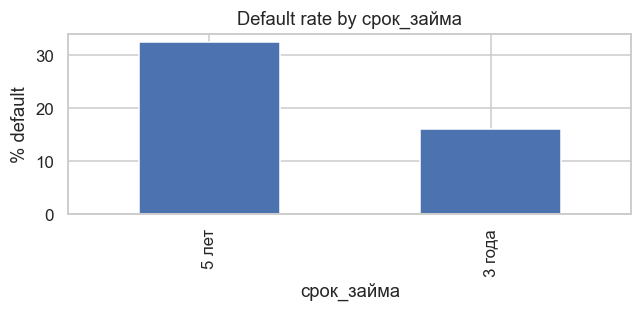

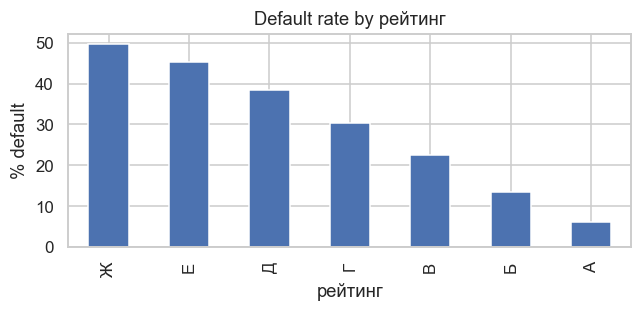

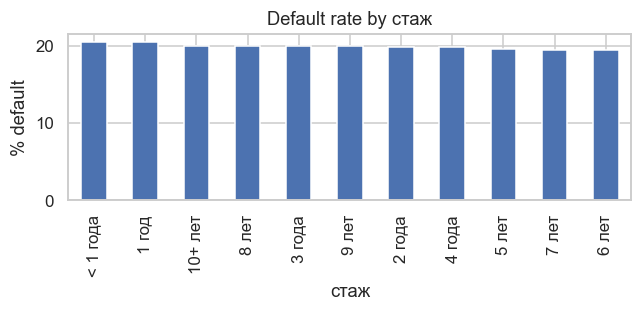

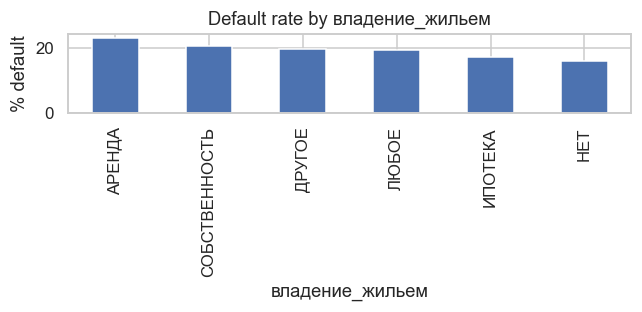

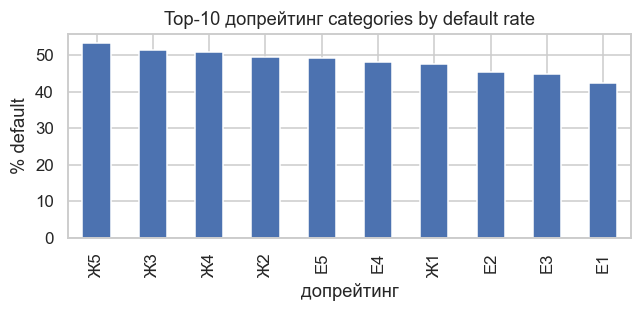

C:\Users\270088\AppData\Local\Temp\ipykernel_2888\1042864740.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


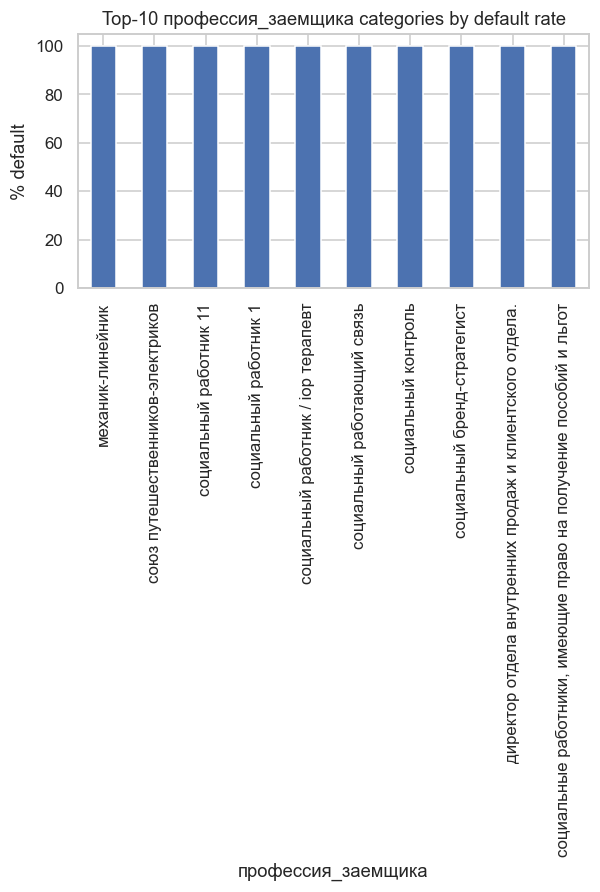

In [ ]:
# ─────────────────────────────────────────────────────────────
# 4. Категориальные признаки: low- и high-card
# ─────────────────────────────────────────────────────────────
cat_cols = df.select_dtypes("object").columns
low_card  = [c for c in cat_cols if df[c].nunique() <= 20]
high_card = [c for c in cat_cols if c not in low_card]

print(f"Categoricals: total={len(cat_cols)} | "
      f"low-card={len(low_card)} | high-card={len(high_card)}")

# default-rate по первым 4 low-card
for col in low_card[:4]:
    rate = (df.groupby(col)[TARGET].mean()*100).sort_values(ascending=False)
    plt.figure(figsize=(6,3))
    rate.plot(kind="bar")
    plt.title(f"Default rate by {col}")
    plt.ylabel("% default")
    plt.tight_layout()
    plt.show()

# top-10 категорий high-card по default-rate (первые 2 столбца)
for col in high_card[:2]:
    top = (df.groupby(col)[TARGET].mean()*100).sort_values(ascending=False).head(10)
    plt.figure(figsize=(6,3))
    top.plot(kind="bar")
    plt.title(f"Top-10 {col} categories by default rate")
    plt.ylabel("% default")
    plt.tight_layout()
    plt.show()

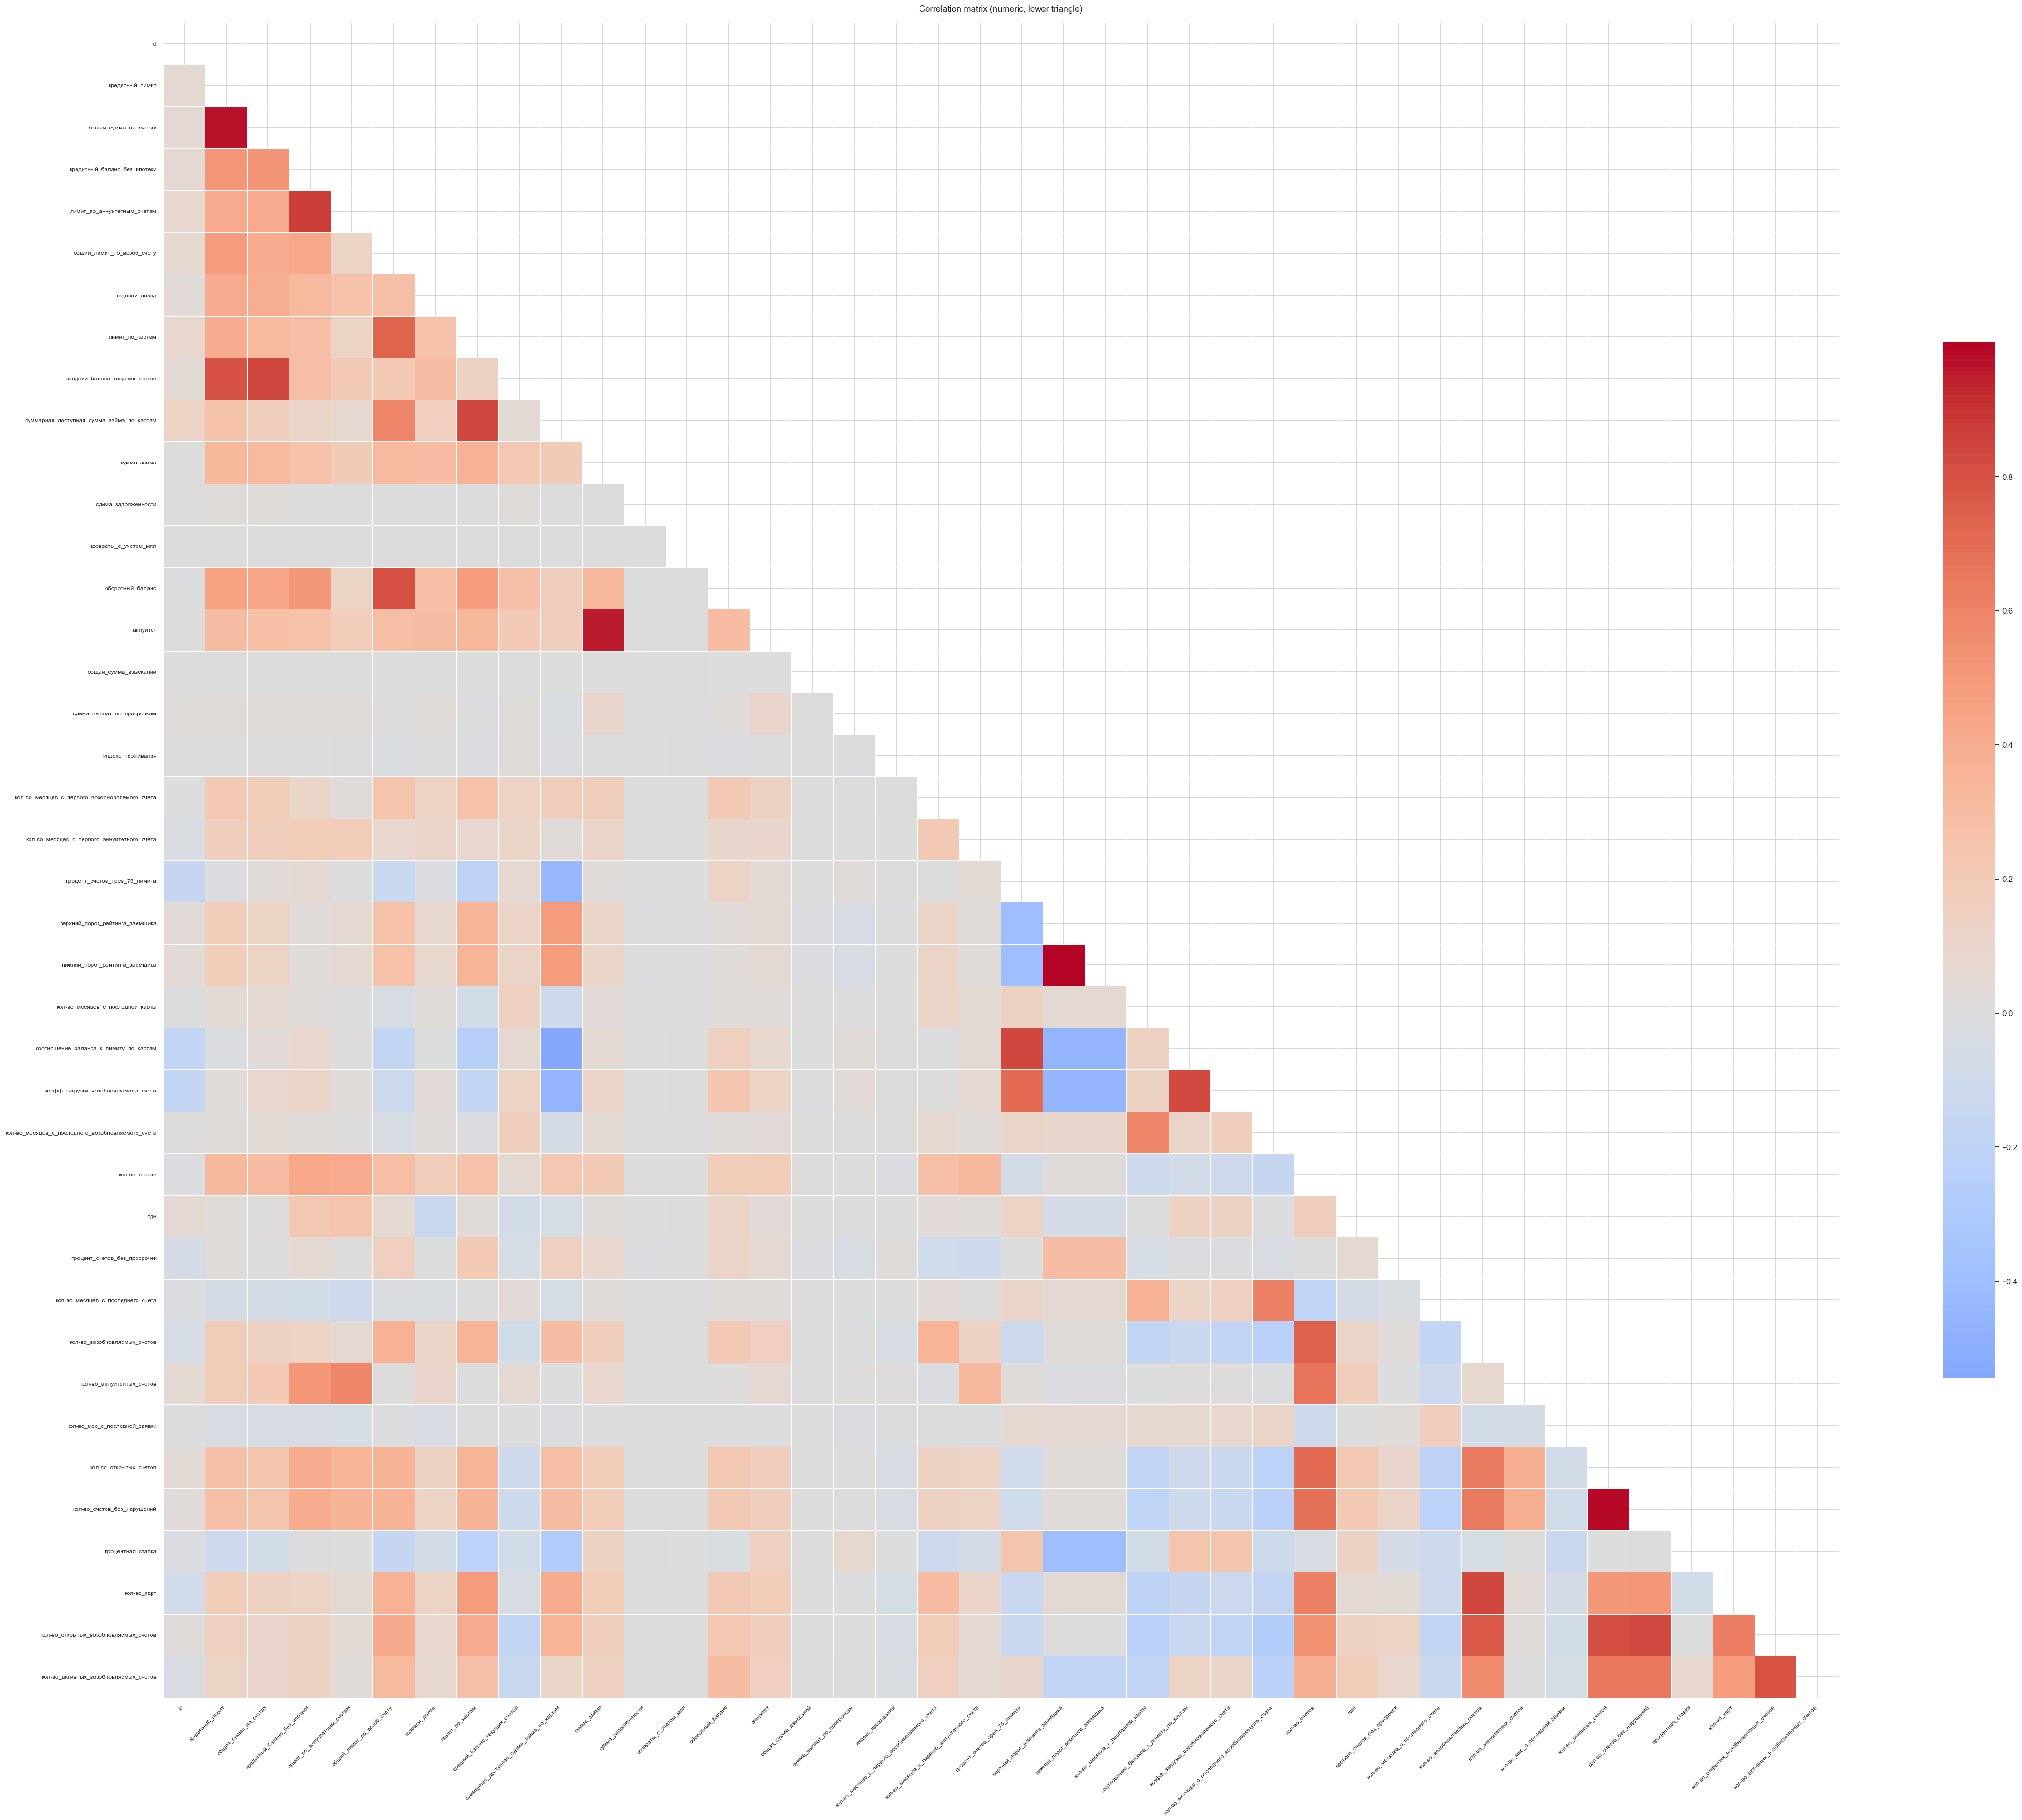

In [ ]:
# ─────────────────────────────────────────────────────────────
# 5. Корреляционная матрица (числовые)
# ─────────────────────────────────────────────────────────────
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

NUM_TOP = 40

num_df = df.select_dtypes("number").copy()

# берём N фич с наибольшим std — они информативнее
if NUM_TOP is not None and len(num_df.columns) > NUM_TOP:
    top_std = num_df.std().sort_values(ascending=False).head(NUM_TOP).index
    num_df = num_df[top_std]

corr = num_df.corr()

# маска верхнего треугольника
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(1.1*len(num_df.columns), 0.9*len(num_df.columns)))
sns.heatmap(
    corr, mask=mask, cmap="coolwarm", center=0, square=True, linewidths=.5,
    cbar_kws=dict(shrink=.6), annot=False, fmt=".2f"
)

plt.xticks(rotation=45, ha="right", fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.title("Correlation matrix (numeric, lower triangle)", pad=16)
plt.tight_layout()
plt.show()

# Feature eng-g & Preprocessing

Сразу удаляем колонку 'id', так как это просто шум.

In [21]:
df = df.drop('id', axis=1)
train_reduced = train_reduced.drop('id', axis=1)
test_reduced = test_reduced.drop('id', axis=1)


Вывод и сравнение топ коррелирующих параметров.

In [14]:
import numpy as np, pandas as pd

CORR_TH = 0.90
num_df  = df.select_dtypes("number").copy()

# матрица абсолютных корреляций
corr = num_df.corr().abs()
# верхний треугольник без диагонали
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

records = []        # для красивого отчёта
drop_cols = set()   # что действительно уберём

for col in upper.columns:
    for idx, val in upper[col].items():
        if val > CORR_TH:
            # правило выбора колонок
            na_a, na_b = num_df[col].isna().mean(), num_df[idx].isna().mean()
            std_a, std_b = num_df[col].std(), num_df[idx].std()

            if   na_a < na_b: keep, drop = col, idx
            elif na_b < na_a: keep, drop = idx, col
            else:
                keep, drop = (col, idx) if std_a > std_b else (idx, col)

            # если keep уже в drop-списке, меняем решение
            if keep in drop_cols:
                keep, drop = drop, keep
            drop_cols.add(drop)

            records.append({
                "feat_A"   : col,
                "feat_B"   : idx,
                "|rho|"    : round(val, 3),
                "better keep"     : keep,
                "better drop"     : drop
            })

report_df = pd.DataFrame(records).sort_values("|rho|", ascending=False)
display(report_df)

print(f"\nЛучше удалить {len(drop_cols)} столбцов:", list(drop_cols))

,feat_A,feat_B,|rho|,better keep,better drop
1,верхний_порог_рейтинга_заемщика,нижний_порог_рейтинга_заемщика,1.000,верхний_порог_рейтинга_заемщика,нижний_порог_рейтинга_заемщика
3,кол-во_счетов_без_нарушений,кол-во_открытых_счетов,0.984,кол-во_открытых_счетов,кол-во_счетов_без_нарушений
2,кол-во_возобновляемых_счетов_с_балансом_более_0,кол-во_активных_возобновляемых_счетов,0.982,кол-во_активных_возобновляемых_счетов,кол-во_возобновляемых_счетов_с_балансом_более_0
4,кредитный_лимит,общая_сумма_на_счетах,0.973,кредитный_лимит,общая_сумма_на_счетах
0,аннуитет,сумма_займа,0.953,сумма_займа,аннуитет



Лучше удалить 5 столбцов: ['аннуитет', 'кол-во_счетов_без_нарушений', 'общая_сумма_на_счетах', 'кол-во_возобновляемых_счетов_с_балансом_более_0', 'нижний_порог_рейтинга_заемщика']


*Анализ колонок на удаление*

1) Данные пораметры показывают буквально одно и то же, следует удалить нижний_порог_рейтинга_заемщика
2) Одно является подмножеством другого, однако я бы не стал удалять ни один из столбцов, поскольку информация, в них содержащаяся, может быть важной для банкинга и сама по себе.
3) Также одно - подмножество другого, но информация о балансе и активности его использования неважной быть не может.
4) Признаки измеряют разные вещи, хоть и связаны. кредитный_лимит показывает доступность кредитных средств, а общая_сумма_на_счетах показывает финансовое состояние заемщика. Следует оставить оба столбца.
5) Оба этих признака важны и несут важную информацию, особенно в совокупности.

Итого: следует удалить один столбец: нижний_порог_рейтинга_заемщика

In [15]:
drop_cols = ['нижний_порог_рейтинга_заемщика']
train_pruned = df.drop(columns=drop_cols)
test_pruned = test_reduced.drop(columns=drop_cols)

Для повышения качества модели был реализован блок feature engineering, включающий в себя несколько этапов. В частности, были созданы новые признаки на основе логарифмирования и биннинга суммы займа, создан флаг высокой процентной ставки, вычислено отношение аннуитета к сумме займа и добавлен флаг наличия залога. Кроме того, для признаков, характеризующихся высокой долей нулевых значений (кредитный лимит, кредитный баланс без ипотеки и т.д.), были созданы бинарные флаги, указывающие на нулевое значение, а также применен логарифм к ненулевым значениям. Эти преобразования направлены на выделение скрытых закономерностей в данных и улучшение предсказательной силы модели.

In [ ]:
# ─────────────────────────────────────────────────────────────
# FE-блок по мотивам обзорной таблицы
# ─────────────────────────────────────────────────────────────
import numpy as np
import pandas as pd

TARGET = "итоговый_статус_займа"
RATE_TH = 14                              # граница «high rate»
ZERO_SPARSITY_TH = 0.95                   # ≥95 % нулей → делаем is_zero_flag

def fe_from_table(df: pd.DataFrame) -> pd.DataFrame:
    X = df.copy()

    # 2. log & bins for сумма_займа
    if "сумма_займа" in X.columns:
        X["loan_amount_log"] = np.log1p(X["сумма_займа"])
        X["loan_amount_bin"] = pd.qcut(X["сумма_займа"], 10, labels=False)

    # 3. процентная_ставка → high_rate flag
    if "процентная_ставка" in X.columns:
        X["high_rate_flag"] = (X["процентная_ставка"] > RATE_TH).astype(int)

    # 4. annuity_ratio
    if {"аннуитет", "сумма_займа"}.issubset(X.columns):
        X["annuity_ratio"] = X["аннуитет"] / (X["сумма_займа"] + 1e-3)

    # 5. has_collateral
    if "кол-во_залогов" in X.columns:
        X["has_collateral"] = (X["кол-во_залогов"] > 0).astype(int)

    # 6. sparse-numeric: is_zero_flag + log-scale for non-zeros
    sparse_cols = [
        c for c in [
            "кредитный_лимит", "кредитный_баланс_без_ипотеки",
            "лимит_по_картам", "лимит_по_аннуитетным_счетам"
        ] if c in X.columns
    ]
    for col in sparse_cols:
        share_zero = (X[col] == 0).mean()
        if share_zero >= ZERO_SPARSITY_TH:
            X[f"{col}_is_zero"] = (X[col] == 0).astype(int)
        # логарифм только для положительных значений
        X[f"{col}_log"] = np.log1p(X[col])

    return X


# ── применяем к train / test ─────────────────────────────────
train_fe2 = fe_from_table(train_pruned)
try:
    test_fe2 = fe_from_table(test_pruned)
except NameError:
    test_fe2 = None

print("✅ FE из таблицы готово.  Train shape:", train_fe2.shape)
print("✅ FE из таблицы готово. Test shape:", test_fe2.shape)

✅ FE из таблицы готово.  Train shape: (1210779, 92)
✅ FE из таблицы готово. Test shape: (134531, 91)


In [20]:
train_fe2 = train_pruned.copy()
test_fe2 = test_pruned.copy()

In [52]:
!pip install category_encoders scikit-learn lightgbm catboost xgboost



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Минимальная предварительная обработка данных, чтобы значения вроде '5 месяцев' и '8 лет' привести к флоту.

In [17]:
import re
import numpy as np
import pandas as pd

# 1. Поиск подозрительных колонок
pattern = re.compile(r'\d+[.,]?\d*\s*(год|года|лет|мес|месяц)', flags=re.IGNORECASE)
suspect_cols = []

for col in train_fe2.select_dtypes(include='object').columns:
    sample = train_fe2[col].dropna().astype(str).head(500)
    if sample.str.contains(pattern).any():
        suspect_cols.append(col)

print("Найдены колонки:", suspect_cols)

# 2. Функция для извлечения числа
def extract_number(text):
    if pd.isna(text):
        return np.nan
    text = str(text).lower().replace(',', '.')
    m = re.search(r'\d+[.]?\d*', text)
    if not m:
        return np.nan
    num = float(m.group())
    if 'мес' in text or 'месяц' in text:
        num /= 12  # переводим месяцы в годы
    return num

# 3. Применяем преобразование
for col in suspect_cols:
    train_fe2[col] = train_fe2[col].apply(extract_number)
    test_fe2[col] = test_fe2[col].apply(extract_number) # тестовый набор

# 4. Заполняем пропуски медианой
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='median')
train_fe2[suspect_cols] = imp.fit_transform(train_fe2[suspect_cols])
test_fe2[suspect_cols] = imp.transform(test_fe2[suspect_cols]) # тестовый набор

# 5. Проверяем, что типы стали числовыми
print("\nТипы данных после преобразования:")
print(train_fe2[suspect_cols].dtypes)


C:\Users\270088\AppData\Local\Temp\ipykernel_2888\369959635.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if sample.str.contains(pattern).any():
C:\Users\270088\AppData\Local\Temp\ipykernel_2888\369959635.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if sample.str.contains(pattern).any():
C:\Users\270088\AppData\Local\Temp\ipykernel_2888\369959635.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if sample.str.contains(pattern).any():
C:\Users\270088\AppData\Local\Temp\ipykernel_2888\369959635.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if sample.str.contains(pattern).any():
C:\Users\270088\AppData\Local\Temp\i

Найдены колонки: ['срок_займа', 'стаж']

Типы данных после преобразования:
срок_займа    float64
стаж          float64
dtype: object


In [ ]:
# Берём данные из очищенного train_reduced ===
TARGET_COL = 'итоговый_статус_займа'

# Признаки X и цель y для ТРЕНИРОВОЧНОГО набора
X_full = train_fe2.drop(columns=[TARGET_COL])
y_full = train_fe2[TARGET_COL]

# Разделяем признаки по типам для ТРЕНИРОВОЧНОГО набора
numeric_features = X_full.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_full.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

print(f"Numeric features: {len(numeric_features)}")
print(f"Categorical features: {len(categorical_features)}")


#  Теперь делаем то же самое для ТЕСТОВОГО набора

# Признаки (X) для ТЕСТОВОГО набора
X_test = test_fe2.drop(columns=[TARGET_COL], errors='ignore')

# Разделяем признаки по типам для ТЕСТОВОГО набора
numeric_features_test = X_test.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features_test = X_test.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

print(f"Numeric features (test): {len(numeric_features_test)}")
print(f"Categorical features (test): {len(categorical_features_test)}")


Numeric features: 74
Categorical features: 17
Numeric features (test): 74
Categorical features (test): 17


# Обучение моделей

В ходе исследования был проведен эксперимент с различными алгоритмами машинного обучения и даже одной MLP. Однако, наилучшие результаты были достигнуты с использованием CatBoost. Это обусловлено тем, что CatBoost хорошо справляется с обработкой категориальных признаков без необходимости предварительного преобразования, обладает встроенными механизмами для работы с пропущенными значениями и устойчив к переобучению, что особенно важно в задачах банковской классификации, где данные часто содержат большое количество категориальных переменных и могут быть подвержены шуму.

In [18]:
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.linear_model      import LogisticRegression, RidgeClassifier
from sklearn.ensemble          import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors         import KNeighborsClassifier
from sklearn.svm               import SVC
from sklearn.neural_network    import MLPClassifier

# Буcтинги
from catboost                  import CatBoostClassifier
from lightgbm                  import LGBMClassifier
from xgboost                   import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

## Опробация на разных моделях

In [ ]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = {
    'LogReg' : LogisticRegression(max_iter=2000, n_jobs=-1),
    'Ridge'  : RidgeClassifier(),
    'KNN'    : KNeighborsClassifier(n_neighbors=25),
}

scoring = {
    'roc_auc' : 'roc_auc',
    'pr_auc'  : 'average_precision',
    'accuracy': 'accuracy',
    'f1'      : 'f1'
}


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

for name, model in models.items():
    print(f"\n=== {name} ===")

    pipe = Pipeline([('prep', preprocess),
                     ('model', model)])

    scores = cross_validate(
        pipe, X_full, y_full,
        cv=cv, scoring=scoring,
        n_jobs=1,             
        return_train_score=False
    )

    mean_scores = {m: np.mean(scores[f'test_{m}']) for m in scoring}
    mean_scores['model'] = name
    results.append(mean_scores)

    # мгновенный вывод
    for m, v in mean_scores.items():
        if m != 'model':
            print(f"{m:>9}: {v:.4f}")



=== LogReg ===
  roc_auc: 0.6443
   pr_auc: 0.2993
 accuracy: 0.7998
       f1: 0.0076

=== Ridge ===
  roc_auc: 0.7620
   pr_auc: 0.5916
 accuracy: 0.8456
       f1: 0.4117

=== KNN ===
  roc_auc: 0.5934
   pr_auc: 0.2563
 accuracy: 0.7992
       f1: 0.0244


In [ ]:
metrics_df = (pd.DataFrame(results)
              .set_index('model')
              .sort_values('roc_auc', ascending=False)
              .style.format('{:.4f}'))
metrics_df


,roc_auc,pr_auc,accuracy,f1
model,,,,
Ridge,0.7620,0.5916,0.8456,0.4117
LogReg,0.6443,0.2993,0.7998,0.0076
KNN,0.5934,0.2563,0.7992,0.0244


In [ ]:
# список object-колонок
cat_cols = X_full.select_dtypes('object').columns.tolist()

boosting_models = {
    'CatBoost': CatBoostClassifier(
        iterations       = 400,
        depth            = 8,
        learning_rate    = 0.05,
        eval_metric      = 'AUC',
        cat_features     = cat_cols,   
        verbose          = False,
        random_state     = 42
    ),
    'LightGBM' : LGBMClassifier(
        n_estimators     = 500,
        learning_rate    = 0.05,
        subsample        = 0.8,
        colsample_bytree = 0.8,
        random_state     = 42
    ),
    'XGBoost'  : XGBClassifier(
        n_estimators     = 500,
        learning_rate    = 0.05,
        subsample        = 0.8,
        colsample_bytree = 0.8,
        tree_method      = 'hist',
        eval_metric      = 'auc',
        random_state     = 42
    )
}

boosting_results = []
for name, model in boosting_models.items():
    print(f"\n=== {name} ===")

    if name == 'CatBoost':              # уже умеет с object-колонками
        estimator = model
    else:                               # остальным нужен preprocess
        estimator = Pipeline([
            ('prep', preprocess),
            ('model', model)
        ])

    scores = cross_validate(
        estimator, X_full, y_full,
        cv=cv, scoring=scoring,
        n_jobs=1,               
        return_train_score=False
    )

    mean_scores = {m: scores[f'test_{m}'].mean() for m in scoring}
    mean_scores['model'] = name
    boosting_results.append(mean_scores)

    for m, v in mean_scores.items():
        if m != 'model':
            print(f"{m:>9}: {v:.4f}")

# сводная таблица
boosting_df = (pd.DataFrame(boosting_results)
               .set_index('model')
               .sort_values('roc_auc', ascending=False))
display(boosting_df)



=== CatBoost ===
  roc_auc: 0.8900
   pr_auc: 0.7924
 accuracy: 0.8981
       f1: 0.6736

=== LightGBM ===
[LightGBM] [Info] Number of positive: 193355, number of negative: 775268
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.137116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8598
[LightGBM] [Info] Number of data points in the train set: 968623, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.199618 -> initscore=-1.388681
[LightGBM] [Info] Start training from score -1.388681
[LightGBM] [Info] Number of positive: 193355, number of negative: 775268
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.123917 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857

,roc_auc,pr_auc,accuracy,f1
model,,,,
CatBoost,0.889994,0.792386,0.898133,0.673593
LightGBM,0.887955,0.790201,0.898261,0.674732
XGBoost,0.887570,0.789275,0.897797,0.672928


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# ==== MLP-модель ====
mlp = MLPClassifier(
        hidden_layer_sizes=(128, 64),
        activation='relu',
        solver='adam',
        max_iter=30,          # можно увеличить после отладки
        random_state=42,
        verbose=False
     )

# Пайплайн: preprocess  ➜  scaler  ➜  MLP
mlp_pipe = Pipeline([
    ('prep', preprocess),          # ColumnTransformer (импутация + OrdinalEncoder)
    ('scaler', StandardScaler(with_mean=False)),  # работает и с разреженными матрицами
    ('model', mlp)
])

print("\n=== MLP ===")
scores = cross_validate(
    mlp_pipe, X_full, y_full,
    cv=cv, scoring=scoring,
    n_jobs=1,                   # во избежание pickling-ошибок
    return_train_score=False
)

mlp_mean = {m: np.mean(scores[f'test_{m}']) for m in scoring}
mlp_mean['model'] = 'MLP'

# вывод метрик сразу
for k, v in mlp_mean.items():
    if k != 'model':
        print(f"{k:>9}: {v:.4f}")

# --- если нужно добавить MLP в общую таблицу ---
all_results = boosting_results + results + [mlp_mean]   # где results — из базовых моделей
final_df = (pd.DataFrame(all_results)
            .set_index('model')
            .sort_values('roc_auc', ascending=False))
display(final_df)



=== MLP ===
  roc_auc: 0.5000
   pr_auc: 0.1996
 accuracy: 0.8004
       f1: 0.0000


,roc_auc,pr_auc,accuracy,f1
model,,,,
CatBoost,0.889994,0.792386,0.898133,0.673593
LightGBM,0.887955,0.790201,0.898261,0.674732
XGBoost,0.887570,0.789275,0.897797,0.672928
Ridge,0.761994,0.591587,0.845580,0.411659
LogReg,0.644266,0.299308,0.799848,0.007567
KNN,0.593407,0.256332,0.799188,0.024427
MLP,0.500000,0.199619,0.800381,0.000000


## CatBoost

Был произведен подбор оптимальных значений для CatBoost.

*Крутился девять часов и выдал результат хуже, чем параметры, взятые наугад.*
*Запускать его смысла нет, но был оставлен для демонстрации навыков*

In [ ]:
# НЕ ЯВЛЯЕТСЯ НЕОБХОДИМЫМ ДЛЯ ЗАПУСКА, ОСТАВЛЕН ДЛЯ ДЕМОНСТРАЦИИ
#
# ============================================================
#  Fast Time-Budget Random Search (short trials, no CV)
#  • итерации ≈ 600–1500 (адаптируются к lr)
#  • ранняя остановка 100
#  • hold-out 80/20, лог в CSV, автосейв лучшей модели
# ============================================================

import time, json, os, random
import numpy as np, pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# --- Параметры ---
TARGET_COL        = "итоговый_статус_займа"
TEST_SIZE         = 0.20
RANDOM_STATE      = 42
TIME_BUDGET_HOURS = 8                 # сколько крутить поиск
LOG_CSV           = "cb_fast_search_log.csv"
BEST_MODEL_PATH   = "cat_best_holdout.cbm"
BEST_PARAMS_JSON  = "cat_best_params.json"

# --- Данные ---
X = train_reduced.drop(columns=[TARGET_COL]).copy()
y = train_reduced[TARGET_COL].values
cat_cols = X.select_dtypes("object").columns.tolist()
X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE
)

# --- Param sampler (короткие трайлы) ---
def sample_params():
    lr = random.choice([0.04, 0.05, 0.06, 0.08])
    # общий шаг ≈ 60: it * lr ≈ 60  -> итерации 600–1500
    it = int(np.clip(round(60 / lr), 600, 1500))
    return {
        "iterations": it,
        "learning_rate": lr,
        "depth": random.choice([5, 6, 7]),
        "l2_leaf_reg": random.choice([4, 6, 8]),
        "subsample": random.choice([0.7, 0.85, 1.0]),
        "rsm": random.choice([0.7, 0.85, 1.0]),
        "bagging_temperature": random.choice([0.0, 0.2, 0.4]),
        "auto_class_weights": random.choice([None, "Balanced"]),
    }

def append_log(trial, auc, fit_sec, best_iter, params):
    row = pd.DataFrame([{
        "trial": trial,
        "auc": auc,
        "fit_seconds": round(fit_sec, 2),
        "best_iter": int(best_iter),
        "params": json.dumps(params, ensure_ascii=False)
    }])
    header = not os.path.exists(LOG_CSV)
    row.to_csv(LOG_CSV, mode="a", header=header, index=False)

def save_best(model, params_with_auc):
    model.save_model(BEST_MODEL_PATH)
    with open(BEST_PARAMS_JSON, "w", encoding="utf-8") as f:
        json.dump(params_with_auc, f, ensure_ascii=False, indent=2)

# --- search loop ---
best_auc, best_params = -1.0, None
trial = 0
deadline = time.time() + TIME_BUDGET_HOURS * 3600
print(f"▶️ Fast search for {TIME_BUDGET_HOURS}h (short trials).")

while time.time() < deadline:
    trial += 1
    params = sample_params()

    model = CatBoostClassifier(
        loss_function="Logloss",
        eval_metric="AUC",
        random_state=RANDOM_STATE + trial,
        cat_features=cat_cols,
        early_stopping_rounds=100,
        verbose=False,
        **{k: v for k, v in params.items() if v is not None}
    )

    t0 = time.time()
    model.fit(X_tr, y_tr, eval_set=(X_val, y_val), use_best_model=True)
    fit_sec = time.time() - t0

    proba = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, proba)
    best_iter = model.get_best_iteration()

    append_log(trial, auc, fit_sec, best_iter, params)

    if auc > best_auc:
        best_auc, best_params = auc, {**params, "best_iter": int(best_iter)}
        save_best(model, {"auc": round(best_auc, 4), **best_params})
        print(f"[{trial:04d}] NEW BEST AUC={auc:.4f} "
              f"| {best_iter} it | {round(fit_sec/60,1)} min | {params}")
    else:
        if trial % 10 == 0:
            print(f"[{trial:04d}] AUC={auc:.4f} | best={best_auc:.4f}")

print("\n⏹️ Done.")
print("Best AUC:", round(best_auc, 4))
print("Best params:", best_params)
print(f"Log:   {LOG_CSV}\nModel: {BEST_MODEL_PATH}")

▶️ Fast search for 8h (short trials).
[0001] NEW BEST AUC=0.7711 | 1499 it | 14.8 min | {'iterations': 1500, 'learning_rate': 0.04, 'depth': 5, 'l2_leaf_reg': 8, 'subsample': 0.85, 'rsm': 0.85, 'bagging_temperature': 0.0, 'auto_class_weights': 'Balanced'}
[0002] NEW BEST AUC=0.7715 | 748 it | 9.3 min | {'iterations': 750, 'learning_rate': 0.08, 'depth': 6, 'l2_leaf_reg': 8, 'subsample': 0.85, 'rsm': 1.0, 'bagging_temperature': 0.4, 'auto_class_weights': None}
[0003] NEW BEST AUC=0.7718 | 749 it | 9.2 min | {'iterations': 750, 'learning_rate': 0.08, 'depth': 6, 'l2_leaf_reg': 8, 'subsample': 0.85, 'rsm': 1.0, 'bagging_temperature': 0.4, 'auto_class_weights': 'Balanced'}
[0005] NEW BEST AUC=0.7719 | 746 it | 10.3 min | {'iterations': 750, 'learning_rate': 0.08, 'depth': 7, 'l2_leaf_reg': 8, 'subsample': 0.7, 'rsm': 1.0, 'bagging_temperature': 0.4, 'auto_class_weights': None}
[0007] NEW BEST AUC=0.7724 | 991 it | 14.3 min | {'iterations': 1000, 'learning_rate': 0.06, 'depth': 7, 'l2_leaf_

Ниже представлена самодостаточная модель, на которой в дальнейшем был произведен подбор оптимальных параметров вручную.

По репорту видно, что даннаямодель обеспечивает много "ложных тревог", но хорошо отсекает строки, в которых точно кредит будет не предоставлен. Отлично подойдет для аккуратной политики кредитования.

In [ ]:
# # НЕ ЯВЛЯЕТСЯ НЕОБХОДИМЫМ ДЛЯ ЗАПУСКА, ОСТАВЛЕН ДЛЯ ДЕМОНСТРАЦИИ
#
# ============================================================
# Обучение CatBoost
# корректируем cat_cols + метрики
# ============================================================

from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, average_precision_score
)
import pandas as pd
import numpy as np

TARGET_COL = 'итоговый_статус_займа'

# 0. Формируем матрицу признаков ещё раз, уже после ВСЕХ преобразований
X_full = train_fe2.drop(columns=[TARGET_COL, 'id']).copy()
y_full = train_fe2[TARGET_COL]

# ── пересобираем корректный список категориальных признаков ──────────────
raw_cat_cols = X_full.select_dtypes('object').columns.tolist()

cat_cols = []                                # финальный список категориальных
for col in raw_cat_cols:
    # Пытаемся принудительно конвертировать в число
    numeric_version = pd.to_numeric(X_full[col], errors='coerce')
    # Если появились NaN -> в колонке есть строки, оставляем как категорию
    if numeric_version.isna().any():
        cat_cols.append(col)
    else:
        # Колонка полностью числовая – заменяем в X_full на float
        X_full[col] = numeric_version

print(f"Категориальных признаков: {len(cat_cols)}")
# ------------------------------------------------------------------------

# 1. 80/20 hold-out для финальной валидации
X_tr, X_val, y_tr, y_val = train_test_split(
    X_full, y_full, test_size=0.20,
    stratify=y_full, random_state=42
)

# 2. Обучаем финальную модель CatBoost
cat_model = CatBoostClassifier(
    iterations    = 1500,
    depth         = 8,
    learning_rate = 0.06,
    eval_metric   = 'AUC',
    cat_features  = cat_cols,
    verbose       = False,
    random_state  = 42,
    l2_leaf_reg   = 5,
    early_stopping_rounds = 150,
    # subsample = 1,
    # rsm = 0.85,
    # bagging_temperature = 0.4,
    # # class_weights=[0.2, 0.8]
)
cat_model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)])

# 3. Метрики на hold-out 20 %
y_pred  = cat_model.predict(X_val)
y_proba = cat_model.predict_proba(X_val)[:, 1]

metrics = {
    'Accuracy' : accuracy_score(y_val, y_pred),
    'Precision': precision_score(y_val, y_pred),
    'Recall'   : recall_score(y_val, y_pred),
    'F1 Score' : f1_score(y_val, y_pred),
    'ROC AUC'  : roc_auc_score(y_val, y_proba),
    'PR AUC'   : average_precision_score(y_val, y_proba)
}

print("\n— Hold-out 20 % метрики —")
for k, v in metrics.items():
    print(f"{k:10}: {v:.4f}")

# 4. Сохраняем модель, чтобы потом использовать на тесте
cat_model.save_model('cat_model.cbm')
print("\n✅  cat_model.cbm сохранён")

Категориальных признаков: 15

— Hold-out 20 % метрики —
Accuracy  : 0.8173
Precision : 0.6352
Recall    : 0.1995
F1 Score  : 0.3036
ROC AUC   : 0.7692
PR AUC    : 0.4807

✅  cat_model.cbm сохранён


Наконец, итоговое обучение модели CatBoost с кросс валидацией на пяти выборках данных из обработанного тренировочного датасета.

In [ ]:
# ============================================================
# Обучение CatBoost + CV на пяти фолдах
# корректируем cat_cols + метрики
# ============================================================
from catboost import CatBoostClassifier
import os
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score
)
import pandas as pd, numpy as np

TARGET_COL   = "итоговый_статус_займа"
N_FOLDS      = 5
RANDOM_STATE = 42

# 0. признаки / цель 
X_full = train_fe2.drop(columns=[TARGET_COL]).copy()
y_full = train_fe2[TARGET_COL].values

cat_cols = [
    c for c in X_full.select_dtypes("object").columns
    if pd.to_numeric(X_full[c], errors="coerce").isna().any()
]
print(f"Категориальных признаков: {len(cat_cols)}")

# 1. модель-шаблон 
base_params = dict(
    iterations          = 1500,
    depth               = 8,
    learning_rate       = 0.06,
    l2_leaf_reg         = 5,
    bagging_temperature = 0.4,
    loss_function       = "Logloss",
    eval_metric         = "AUC",
    cat_features        = cat_cols,
    random_state        = 42,
    verbose             = False,
    early_stopping_rounds = 150,
    # subsample = 1.0,
    # rsm = 0.85,
    # auto_class_weights = 'Balanced'
)

# 2. Stratified K-fold CV 
skf        = StratifiedKFold(N_FOLDS, shuffle=True, random_state=RANDOM_STATE)
oof_proba  = np.zeros(len(X_full))
fold_auc   = []

for fold, (tr_idx, val_idx) in enumerate(skf.split(X_full, y_full), 1):
    model = CatBoostClassifier(**base_params)
    model.fit(X_full.iloc[tr_idx], y_full[tr_idx],
              eval_set=(X_full.iloc[val_idx], y_full[val_idx]))
    
    oof_proba[val_idx] = model.predict_proba(X_full.iloc[val_idx])[:, 1]
    auc = roc_auc_score(y_full[val_idx], oof_proba[val_idx])
    fold_auc.append(auc)
    print(f"Fold {fold:>2}: AUC = {auc:.4f}")
    model.save_model(f"catboost_fold_{fold}.cbm")

print(f"\n❱❱ CV mean AUC : {np.mean(fold_auc):.4f} ± {np.std(fold_auc):.4f}")

# 3. метрики на OOF-предсказаниях
def report(th):
    preds = (oof_proba >= th).astype(int)
    print(f"\n— CV OOF metrics (threshold={th:.2f}) —")
    print(f"Accuracy : {accuracy_score (y_full, preds):.4f}")
    print(f"Precision: {precision_score(y_full, preds):.4f}")
    print(f"Recall   : {recall_score   (y_full, preds):.4f}")
    print(f"F1-score : {f1_score      (y_full, preds):.4f}")

report(0.50)        # стандартный порог
report(0.30)        # recall-friendly

print(f"\nROC-AUC : {roc_auc_score(y_full, oof_proba):.4f}")
print(f"PR-AUC  : {average_precision_score(y_full, oof_proba):.4f}")

# 4. финальное дообучение на всём датасете
# копируем базовые гиперы и убираем early_stopping / verbose-дубликат
full_params = base_params.copy()
full_params.pop("early_stopping_rounds", None)   # на всём датасете не нужно
# verbose уже есть в full_params, второй раз НЕ передаём

final_model = CatBoostClassifier(**full_params)
final_model.fit(X_full, y_full)

final_model.save_model("cat_model.cbm")
print("\n✅  cat_model.cbm сохранён — готов к инференсу")

Категориальных признаков: 15
Fold  1: AUC = 0.7725
Fold  2: AUC = 0.7726
Fold  3: AUC = 0.7744
Fold  4: AUC = 0.7724
Fold  5: AUC = 0.7730

❱❱ CV mean AUC : 0.7730 ± 0.0008

— CV OOF metrics (threshold=0.50) —
Accuracy : 0.8187
Precision: 0.6399
Recall   : 0.2102
F1-score : 0.3165

— CV OOF metrics (threshold=0.30) —
Accuracy : 0.7866
Precision: 0.4669
Recall   : 0.4864
F1-score : 0.4764

ROC-AUC : 0.7730
PR-AUC  : 0.4883

✅  cat_model.cbm сохранён — готов к инференсу


In [31]:
proba_full = final_model.predict_proba(X_full)[:, 1]
print(f"\nTrain ROC-AUC : {roc_auc_score(y_full, proba_full):.4f}")
print(f"Train PR-AUC  : {average_precision_score(y_full, proba_full):.4f}")


Train ROC-AUC : 0.9549
Train PR-AUC  : 0.8639


Прогон тестовых данных через модель и формирование сабмишн файла.

In [ ]:
# ============================================================
#  БЛОК  «test → preprocess → CatBoost → submission.csv»
#  (train_reduced, cat_model, columns_to_drop, suspect_cols
#   уже должны быть в памяти)
# ============================================================
import pandas as pd, numpy as np, re
from pathlib import Path
from catboost import CatBoostError


TEST_PATH = Path("shift_ml_2025_test.csv")
SUB_PATH  = Path("submission.csv")
TARGET_COL = "итоговый_статус_займа"


# 1. порядок и cat-колонки из модели
model_features     = list(final_model.feature_names_)      
model_cat_idx      = final_model._get_cat_feature_indices()   
model_cat_features = [model_features[i] for i in model_cat_idx]


# 2. базовый препроцессинг теста (на всякий случай) 
num_cols = [c for c in train_fe2.select_dtypes(["int64", "float64"])
            if c != TARGET_COL]
cat_cols = [c for c in train_fe2.select_dtypes("object")
            if c != TARGET_COL]

medians = train_fe2[num_cols].median()
modes   = train_fe2[cat_cols].mode().iloc[0]

test_fe2[num_cols] = test_fe2[num_cols].fillna(medians)
test_fe2[cat_cols] = test_fe2[cat_cols].fillna(modes)


# 3. приводим к Точному набору/порядку
X_test = test_fe2.reindex(columns=model_cat_features, fill_value=np.nan)


# 4. все cat-признаки
for c in model_cat_features:
    if c in X_test.columns:
        X_test[c] = X_test[c].apply(
            lambda v: str(int(v)) if isinstance(v, (float, int, np.floating)) else str(v)
        ).fillna("missing")


# 5. предсказание
try:
    proba = final_model.predict_proba(test_fe2)[:, 1]
except CatBoostError as e:
    raise RuntimeError(f"CatBoost опять упал:\n{e}")


# 6. формируем submission.csv
id_col = "id" if "id" in test_fe2.columns else test.index
pd.DataFrame({"id": test_fe2[id_col], "proba": proba}).to_csv(SUB_PATH, index=False)
print(f"✅  {SUB_PATH} сохранён — {len(test_fe2)} строк")


✅  submission.csv сохранён — 134531 строк


# Дополнительно

Дополнительно было произведено сравнение тестового и тренировочного датасетов с целью выяснить, насколько сильно они отличаются, и может ли это стать проблемой для модели.

In [ ]:
# ============================================================
#  ADVERSARIAL VALIDATION  (train_reduced  vs  test)
# ============================================================

import numpy as np, pandas as pd, re, warnings
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")
TARGET_COL = 'итоговый_статус_займа'

# ---------- 0. безопасно получаем вспом. списки --------------
columns_to_drop = globals().get('columns_to_drop', [])          
suspect_cols    = globals().get('suspect_cols',   [])

if not suspect_cols:     
    text_cols = train_reduced.select_dtypes('object').columns
    mask = text_cols.map(lambda c: train_reduced[c]
                          .astype(str)
                          .str.contains(r'\b(лет|месяц|мес)\b', case=False, na=False)
                          .any())
    suspect_cols = text_cols[mask].tolist()
    print("Авто-detect suspect_cols:", suspect_cols)

# ---------- вспом-функция «5 лет / 36 мес» → float(лет) -------
_pat = re.compile(r'\d+[.,]?\d*')
def to_years(x):
    if pd.isna(x): return np.nan
    s = str(x).lower().replace(',', '.')
    m = _pat.search(s)
    if not m: return np.nan
    v = float(m.group())
    if 'мес' in s or 'месяц' in s:
        v /= 12
    return v

# ---------- 1. статистики train для иммутации ----------------
num_cols = [c for c in train_reduced.select_dtypes(['int64', 'float64'])
            if c != TARGET_COL]
cat_cols = [c for c in train_reduced.select_dtypes('object')
            if c != TARGET_COL]

medians = train_reduced[num_cols].median()
modes   = train_reduced[cat_cols].mode().iloc[0]

# ---------- 2. единая функция препроцессинга -----------------
def _prep(df_src):
    df = df_src.copy()

    # drop тех же плохих колонок
    df = df.drop(columns=columns_to_drop, errors='ignore')

    # suspect_cols  «N лет / мес» -> годы
    for col in suspect_cols:
        if col in df.columns:
            df[col] = df[col].apply(to_years)

    # заполнение пропусков
    df[num_cols] = df[num_cols].fillna(medians)
    df[cat_cols] = df[cat_cols].fillna(modes)

    # все категориальные -> строки
    df[cat_cols] = df[cat_cols].astype(str)

    # строгий порядок колонок
    df = df.reindex(columns=num_cols + cat_cols, fill_value=np.nan)
    return df

X_train_clean = _prep(train_reduced.drop(columns=[TARGET_COL]))
X_test_clean  = _prep(test)

# ---------- 3. формируем adversarial датасет -----------------
X_adv = pd.concat([X_train_clean, X_test_clean], ignore_index=True)
y_adv = np.r_[np.zeros(len(X_train_clean)), np.ones(len(X_test_clean))] 

X_tr, X_val, y_tr, y_val = train_test_split(
    X_adv, y_adv, test_size=0.25, stratify=y_adv, random_state=42
)

# ---------- 4. обучаем детектор различий ----------------------
detector = CatBoostClassifier(
    iterations=400, depth=6, learning_rate=0.05,
    loss_function='Logloss', eval_metric='AUC',
    cat_features=cat_cols,
    verbose=False, random_state=42
)
detector.fit(X_tr, y_tr, eval_set=(X_val, y_val))

adv_auc = roc_auc_score(y_val, detector.predict_proba(X_val)[:, 1])
print(f"\nAdversarial ROC-AUC = {adv_auc:.3f} "
      "(≈0.5 — выборки похожи, >0.70 — заметный drift)")

# ---------- 5. топ-фичи дрейфа --------------------------------
imp = (detector.get_feature_importance(type='FeatureImportance', prettified=True)
              .sort_values('Importances', ascending=False)
              .head(10))
print("\nTOP-10 признаков, по которым train и test отличаются сильнее всего:")
print(imp.to_string(index=False))


🔍  Adversarial ROC-AUC = 0.502 (≈0.5 — выборки похожи, >0.70 — заметный drift)

⚠️  TOP-10 признаков, по которым train и test отличаются сильнее всего:
                        Feature Id  Importances
     кол-во_мес_с_последней_заявки    10.500181
кол-во_текущих_просроченных_счетов     8.103212
        общий_лимит_по_возоб_счету     7.565860
                          аннуитет     6.314373
  кол-во_открытых_счетов_за_2_года     5.660749
      процент_счетов_без_просрочек     5.574756
               сумма_задолженности     5.385643
                                id     4.893818
       лимит_по_аннуитетным_счетам     4.423663
            кол_во_субсидий_за_год     4.366590


Также была предпринята попытка сделать ансамбль из бустингов, но он несколько раз упал после четырех часов работы по случаю 'bad allocation', и попытки его доработать на этом были прекращены.

In [ ]:
from pathlib import Path
import numpy as np, pandas as pd, pickle, joblib, gc, warnings
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, average_precision_score
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb

warnings.filterwarnings("ignore")

TARGET_COL = "итоговый_статус_займа"
N_SPLITS   = 5
SEED       = 42
OUT_DIR    = Path("models_ensemble")
OUT_DIR.mkdir(exist_ok=True, parents=True)

# ---------- 0. Разделяем признаки ----------
X = train_reduced.drop(columns=[TARGET_COL]).copy()
y = train_reduced[TARGET_COL].values

cat_features = X.select_dtypes("object").columns.tolist()
cat_idx      = [X.columns.get_loc(c) for c in cat_features]

# ---------- 1. Заготовки для OOF ----------
oof_cat = np.zeros(len(X))
oof_lgb = np.zeros(len(X))
oof_xgb = np.zeros(len(X))

skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED)

# ---------- 2. CV-цикл ----------
for fold, (tr, val) in enumerate(skf.split(X, y), 1):
    print(f"\n── Fold {fold}/{N_SPLITS} ─────────────────────────")

    X_tr, X_val = X.iloc[tr], X.iloc[val]
    y_tr, y_val = y[tr], y[val]


    # =============== XGBoost (old-version friendly) =============
    X_tr_xgb  = X_tr.copy()
    X_val_xgb = X_val.copy()

    for c in cat_features:
        # превращаем в pandas.cat.codes  (int) одинаковым словарём
        codes_tr  = X_tr_xgb[c].astype("category")
        codes_val = X_val_xgb[c].astype("category").cat.set_categories(codes_tr.cat.categories)
        X_tr_xgb[c]  = codes_tr.cat.codes
        X_val_xgb[c] = codes_val.cat.codes

    xgb_model = xgb.XGBClassifier(
        n_estimators=1500,           # без early-stop – чуть меньше деревьев
        learning_rate=0.03, max_depth=6,
        subsample=0.8, colsample_bytree=0.8,
        reg_lambda=5, eval_metric="auc",
        random_state=SEED, tree_method="hist", n_jobs=-1
    )

    xgb_model.fit(
        X_tr_xgb, y_tr,
        eval_set=[(X_val_xgb, y_val)],
        verbose=False               # у старых версий только так
    )

    oof_xgb[val] = xgb_model.predict_proba(X_val_xgb)[:, 1]


    # =============== LightGBM  (fixed dtypes) ==================
    # копия данных, чтобы не менять X_tr / X_val для других моделей
    X_tr_lgb  = X_tr.copy()
    X_val_lgb = X_val.copy()

    for c in cat_features:
        if X_tr_lgb[c].dtype == "object":
            X_tr_lgb[c]  = X_tr_lgb[c].astype("category")
            X_val_lgb[c] = X_val_lgb[c].astype("category")

    lgb_train = lgb.Dataset(X_tr_lgb, y_tr,
                            categorical_feature=cat_features,
                            free_raw_data=False)
    lgb_val   = lgb.Dataset(X_val_lgb, y_val,
                            categorical_feature=cat_features,
                            free_raw_data=False)

    lgb_params = dict(
        objective="binary", metric="auc",
        learning_rate=0.03,
        num_leaves=31, max_depth=-1,
        feature_fraction=0.8, bagging_fraction=0.8, bagging_freq=1,
        lambda_l1=0.0, lambda_l2=5.0,
        verbose=-1, seed=SEED
    )

    lgb_model = lgb.train(
        lgb_params,
        lgb_train,
        num_boost_round=3000,
        valid_sets=[lgb_val],
        callbacks=[lgb.early_stopping(stopping_rounds=200, verbose=False)]
    )

    oof_lgb[val] = lgb_model.predict(X_val_lgb, num_iteration=lgb_model.best_iteration)

    # =============== CatBoost ===============================
    cat_model = CatBoostClassifier(
        iterations=1200, learning_rate=0.03, depth=6,
        l2_leaf_reg=6, subsample=0.8, cat_features=cat_idx,
        eval_metric="AUC", random_state=SEED,
        early_stopping_rounds=80, verbose=False
    )
    cat_model.fit(X_tr, y_tr, eval_set=(X_val, y_val))
    oof_cat[val] = cat_model.predict_proba(X_val)[:, 1]



# ---------- 3. OOF-метрики ----------
def rpt(name, pred):
    print(f"{name:<6}  AUC={roc_auc_score(y, pred):.4f}  PR-AUC={average_precision_score(y, pred):.4f}")

print("\n— Out-of-Fold метрики —")
rpt("Cat",  oof_cat)
rpt("LGBM", oof_lgb)
rpt("XGB",  oof_xgb)

oof_ens = (oof_cat + oof_lgb + oof_xgb) / 3
print("\nEnsemble  AUC=", f"{roc_auc_score(y, oof_ens):.4f}",
      " PR-AUC=", f"{average_precision_score(y, oof_ens):.4f}")

# # ---------- 4. Финальное дообучение на всём train ----------
# -------- CatBoost (все типы поддерживает сам) -------------
final_cat = CatBoostClassifier(
    iterations=1200, learning_rate=0.03, depth=6,
    l2_leaf_reg=6, subsample=0.8,
    cat_features=cat_idx, eval_metric="AUC",
    random_state=SEED, verbose=False
).fit(X, y)

# -------- LightGBM  (нужен dtype category) ------------------
X_lgb = X.copy()
for c in cat_features:
    X_lgb[c] = X_lgb[c].astype("category")

final_lgb = lgb.train(
    lgb_params,
    lgb.Dataset(X_lgb, y, categorical_feature=cat_features),
    num_boost_round=int(1.2 * oof_lgb.size / N_SPLITS)   # прежняя эвристика
)

# -------- XGBoost  (старые версии — только числа) ----------
X_xgb = X.copy()
for c in cat_features:
    X_xgb[c] = X_xgb[c].astype("category").cat.codes   

final_xgb = xgb.XGBClassifier(
    n_estimators=int(1.2 * oof_xgb.size / N_SPLITS),
    learning_rate=0.03, max_depth=6,
    subsample=0.8, colsample_bytree=0.8,
    reg_lambda=5, eval_metric="auc",
    random_state=SEED, tree_method="hist", n_jobs=-1
).fit(X_xgb, y)

# print("\n Тренируем финальные модели на всём train")

# final_cat = CatBoostClassifier(
#     iterations=1200, learning_rate=0.03, depth=6,
#     l2_leaf_reg=6, subsample=0.8, cat_features=cat_idx,
#     eval_metric="AUC", random_state=SEED, verbose=False
# ).fit(X, y)

# final_lgb = lgb.train(
#     lgb_params,
#     lgb.Dataset(X, y, categorical_feature=cat_features),
#     num_boost_round=int(1.2 * oof_lgb.size / N_SPLITS)  # простая эвристика
# )

# final_xgb = xgb.XGBClassifier(
#     n_estimators=int(1.2 * oof_xgb.size / N_SPLITS),
#     learning_rate=0.03, max_depth=6,
#     subsample=0.8, colsample_bytree=0.8,
#     reg_lambda=5, eval_metric="auc",
#     random_state=SEED, tree_method="hist", n_jobs=-1
# ).fit(X, y)
# ГАВНО ПАДАЕТ ИЗЗА ВЕРСИЙ

# ---------- 5. Сохраняем всё -------------------------------
final_cat.save_model(OUT_DIR / "cat_model.cbm")
final_lgb.save_model(str(OUT_DIR / "lgb_model.txt"))
final_xgb.save_model(str(OUT_DIR / "xgb_model.json"))

ensemble_meta = {
    "weights": {"cat": 1/3, "lgb": 1/3, "xgb": 1/3},
    "cat_path": str(OUT_DIR / "cat_model.cbm"),
    "lgb_path": str(OUT_DIR / "lgb_model.txt"),
    "xgb_path": str(OUT_DIR / "xgb_model.json"),
    "cat_features": cat_features
}
with open(OUT_DIR / "ensemble_meta.pkl", "wb") as f:
    pickle.dump(ensemble_meta, f)

print("\nCatBoost, LightGBM, XGBoost и meta-файл сохранены в", OUT_DIR)


── Fold 1/5 ─────────────────────────


KeyboardInterrupt: 